# Dataset preparation

In [ ]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
# Mount Google Drive
drive.mount('/content/gdrive')

### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = "/content/gdrive/My Drive/BIOINFORMATICSII/Assignment/"
model_loc = "/content/gdrive/My Drive/BIOINFORMATICSII/Assignment/"

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['heart.csv', 'Assignment 2_Heart_Disease_NN.ipynb', 'Grid Search_ Assignment 3_Heart_Disease_NN.ipynb']


In [ ]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.
print(data.info())
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      1

In [ ]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

In [ ]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data = pd.get_dummies(data, drop_first=True)

In [ ]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values # take target of the value
y = y.reshape(y.shape[0],1) # reshape y array into 1 dimension
x = data.drop(['target'],axis=1) #drop the  'target' in the x data
##
print(x.shape)
print(y.shape)

(303, 21)
(303, 1)


In [ ]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset
data = pd.DataFrame({'A':[10,20,30], 'B':[100,200,300], 'C':[1000, 2000, 3000]})
print("Original Dataset:")
print(data)


Original Dataset:
    A    B     C
0  10  100  1000
1  20  200  2000
2  30  300  3000


In [ ]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()


,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.111702,0.257092,0.413121,0.265957,0.004078,0.000000,0.001773,0.000000,0.000000,0.001773,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.001773,0.000000,0.0
1,0.065603,0.230496,0.443262,0.331560,0.006206,0.000000,0.001773,0.000000,0.001773,0.000000,...,0.001773,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0
2,0.072695,0.230496,0.361702,0.304965,0.002482,0.003546,0.000000,0.001773,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0
3,0.099291,0.212766,0.418440,0.315603,0.001418,0.003546,0.001773,0.001773,0.000000,0.000000,...,0.001773,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0
4,0.101064,0.212766,0.627660,0.289007,0.001064,0.003546,0.000000,0.000000,0.000000,0.000000,...,0.001773,0.0,0.001773,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0


After applying min-max normalization to the heart dataset, all values are scaled to a range between 0 and 1. This ensures uniformity in the scale of features, facilitating better learning for machine learning algorithms.

In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.33, random_state=42)

# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(212, 21)
(60, 21)
(31, 21)


# Original Model

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

In [ ]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
14/14 [==============================] - 1s 22ms/step - loss: 0.2498 - acc: 0.5425 - val_loss: 0.2478 - val_acc: 0.5500
Epoch 2/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2485 - acc: 0.5425 - val_loss: 0.2477 - val_acc: 0.5500
Epoch 3/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2485 - acc: 0.5425 - val_loss: 0.2475 - val_acc: 0.5500
Epoch 4/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2484 - acc: 0.5425 - val_loss: 0.2475 - val_acc: 0.5500
Epoch 5/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.2485 - acc: 0.5425 - val_loss: 0.2475 - val_acc: 0.5500
Epoch 6/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.2483 - acc: 0.5425 - val_loss: 0.2475 - val_acc: 0.5500
Epoch 7/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.2486 - acc: 0.5425 - val_loss: 0.2475 - val_acc: 0.5500
Epoch 8/1000
14/14 [==============================] - 0s 6ms/step - loss: 0

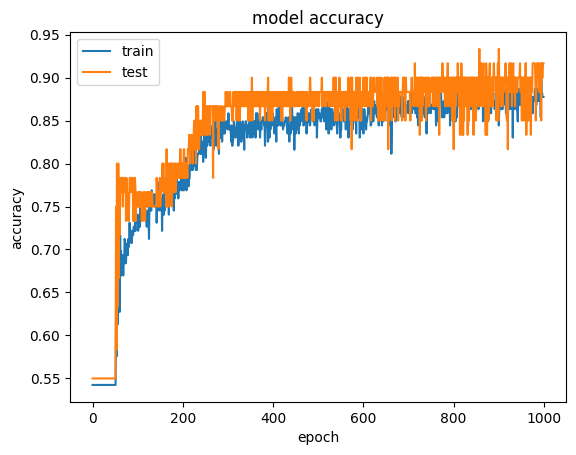

In [ ]:


plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

# The plot generated by this code represents the model's accuracy over epochs during training and validation.

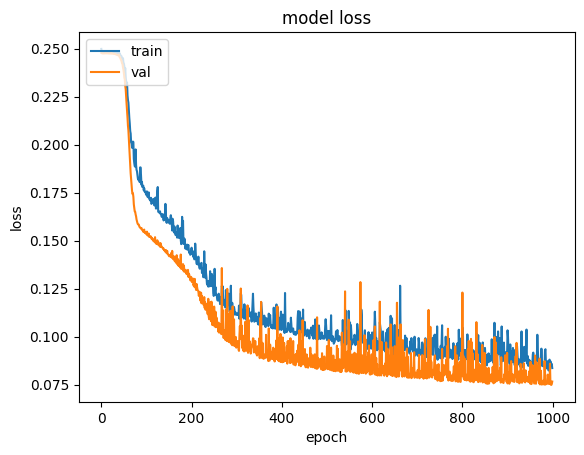

In [ ]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

In [ ]:
### 14. What is the purpose of evaluating the model on the test dataset?

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

# The purpose of evaluating the model on the test dataset is to assess
# its performance and generalization ability on unseen data that was not
# used during training or validation.

1/1 [==============================] - 0s 38ms/step - loss: 0.2044 - acc: 0.7419

acc: 74.19%
loss: 0.2


In [ ]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

1/1 [==============================] - 0s 100ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [0]  Predicted: [0] Result: Pass
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [0] Result: Pass
No: 6 Actual: [0]  Predicted: [1]  Result: Fail
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [0] Result: Pass
No: 12 Actual: [0]  Predicted: [0] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [0]  Predicted: [0] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [1]  Predicted: [1] Result:

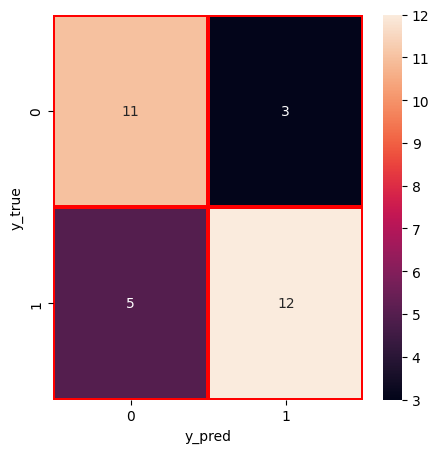


              precision    recall  f1-score   support

           0       0.69      0.79      0.73        14
           1       0.80      0.71      0.75        17

    accuracy                           0.74        31
   macro avg       0.74      0.75      0.74        31
weighted avg       0.75      0.74      0.74        31



In [ ]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

# Grid Search

In [ ]:
! pip install scikeras

In [ ]:
# Use scikit-learn to grid search the activation function
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from keras import Sequential
from keras import layers
from scikeras.wrappers import KerasClassifier

In [ ]:
# Function to create model, required for KerasClassifier
# Default values for activation function is softmax, learning rate is 0.01, based on the original model
# neurons1 default value is 64, while neurons 2 is 32.
def create_model(neurons1=64, neurons2=32, learn_rate=0.01, activation1='softmax', activation2='softmax'):
  model = Sequential()
  model.add(Dense(neurons1, input_shape=(21,), activation=activation1))
  model.add(Dense(neurons2, activation=activation2))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=learn_rate, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'), metrics=['acc'])
  return model


# create model
model = KerasClassifier(model=create_model, epochs=1000, verbose=0)

# define the grid search parameters
param_grid = [
    {'model__activation1': ['relu'], 'model__activation2': ['softmax', 'relu'], 'optimizer__learning_rate': [0.001, 0.0001], 'model__neurons1': [128], 'model__neurons2': [32], 'batch_size': [32, 64]},
    {'model__activation1': ['relu'], 'model__activation2': ['softmax', 'relu'], 'optimizer__learning_rate': [0.001, 0.0001], 'model__neurons1': [64], 'model__neurons2': [64], 'batch_size': [32, 64]}
]

# peform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

best_model = None
best_score = 0

for i, (mean, stdev, param) in enumerate(zip(means, stds, params)):
    print("Model %d: %f (%f) with: %r" % (i+1, mean, stdev, param))
    if mean > best_score:
        best_score = mean
        best_model = i+1

print("Best Model is Model %d with score %f" % (best_model, best_score))


Best: 0.830011 using {'batch_size': 32, 'model__activation1': 'relu', 'model__activation2': 'relu', 'model__neurons1': 64, 'model__neurons2': 64, 'optimizer__learning_rate': 0.0001}
Model 1: 0.811074 (0.060530) with: {'batch_size': 32, 'model__activation1': 'relu', 'model__activation2': 'softmax', 'model__neurons1': 128, 'model__neurons2': 32, 'optimizer__learning_rate': 0.001}
Model 2: 0.796899 (0.058303) with: {'batch_size': 32, 'model__activation1': 'relu', 'model__activation2': 'softmax', 'model__neurons1': 128, 'model__neurons2': 32, 'optimizer__learning_rate': 0.0001}
Model 3: 0.792027 (0.065642) with: {'batch_size': 32, 'model__activation1': 'relu', 'model__activation2': 'relu', 'model__neurons1': 128, 'model__neurons2': 32, 'optimizer__learning_rate': 0.001}
Model 4: 0.782835 (0.049232) with: {'batch_size': 32, 'model__activation1': 'relu', 'model__activation2': 'relu', 'model__neurons1': 128, 'model__neurons2': 32, 'optimizer__learning_rate': 0.0001}
Model 5: 0.796456 (0.08151